In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [194]:
data = pd.read_csv("data/train_data.csv")
data.head()

,admission_id,patient_id,race,gender,age,weight,admission_type_code,discharge_disposition_code,admission_source_code,time_in_hospital,...,blood_type,hemoglobin_level,blood_transfusion,max_glu_serum,A1Cresult,diuretics,insulin,change,diabetesMed,readmitted
0,0,199042938,Caucasian,Male,[50-60),?,3.0,1.0,1,1,...,A+,14.5,False,None,None,No,No,No,Yes,No
1,1,91962954,Caucasian,Male,[80-90),?,2.0,1.0,7,3,...,B+,15.7,False,None,>7,No,No,No,No,Yes
2,2,109707084,EURO,Female,[60-70),?,1.0,1.0,7,5,...,O+,13.0,False,NONE,None,No,Yes,Ch,Yes,No
3,3,157495374,Black,Female,[70-80),?,6.0,1.0,17,2,...,AB-,13.5,False,NONE,>8,No,No,No,Yes,No
4,4,82692360,Caucasian,Female,NaN,?,1.0,22.0,7,12,...,A+,13.0,False,None,None,No,No,No,No,No


In [195]:
data.shape

(81412, 34)

In [196]:
data_dictionary = pd.read_csv("data/Data Dictionary.csv")
data_dictionary

,Variable name,Description,Codes
0,admission_id,Unique identifier of an encounter,NaN
1,patient_id,Unique identifier of a patient,NaN
2,race,Patient race,NaN
3,gender,Patient gender,NaN
4,age,Patient age grouped in 10-year intervals,NaN
5,weight,Patient weight (lb),NaN
6,admission_type_code,Admission type identifier,1: Emergency\r\n2: Urgent\r\n3: Elective\r\n4:...
7,discharge_disposition_code,discharge_disposition_code,1: Discharged to home\r\n2: Discharged/transfe...
8,admission_source_code,Admission source identifier,1: Physician Referral\n2: Clinic Referral\n3: ...
9,time_in_hospital,Number of days between admission and discharge,NaN


## Processind and cleaning data
- Check if there are nans


In [197]:
def check_for_nans(df):
    return(np.sum(df.isnull()))

def check_column(df, column_name):
    print(f"Feature: {column_name}")
    print(f"Unique values: {df[column_name].unique()}")
    print(f"dtype: {df[column_name].dtypes}")
    print(f"Num of nan: {df[column_name].isnull().sum()}")

In [198]:
check_for_nans(data)

admission_id                      0
patient_id                        0
race                              0
gender                            0
age                            2336
weight                         1560
admission_type_code            1162
discharge_disposition_code      571
admission_source_code             0
time_in_hospital                  0
payer_code                        0
medical_specialty                 0
has_prosthesis                    0
complete_vaccination_status       0
num_lab_procedures             1493
num_procedures                    0
num_medications                2678
number_outpatient                 0
number_emergency                  0
number_inpatient                  0
diag_1                            0
diag_2                         1349
diag_3                            0
number_diagnoses                  0
blood_type                        0
hemoglobin_level                  0
blood_transfusion                 0
max_glu_serum               

In [199]:
data.dtypes

admission_id                     int64
patient_id                       int64
race                            object
gender                          object
age                             object
weight                          object
admission_type_code            float64
discharge_disposition_code     float64
admission_source_code            int64
time_in_hospital                 int64
payer_code                      object
medical_specialty               object
has_prosthesis                    bool
complete_vaccination_status     object
num_lab_procedures             float64
num_procedures                   int64
num_medications                float64
number_outpatient                int64
number_emergency                 int64
number_inpatient                 int64
diag_1                          object
diag_2                          object
diag_3                          object
number_diagnoses                 int64
blood_type                      object
hemoglobin_level         

In [200]:
data.nunique()

admission_id                   81412
patient_id                     60069
race                              15
gender                             3
age                               10
weight                            10
admission_type_code                8
discharge_disposition_code        25
admission_source_code             17
time_in_hospital                  14
payer_code                        18
medical_specialty                 71
has_prosthesis                     2
complete_vaccination_status        3
num_lab_procedures               115
num_procedures                     7
num_medications                   73
number_outpatient                 39
number_emergency                  29
number_inpatient                  21
diag_1                           701
diag_2                           725
diag_3                           761
number_diagnoses                  16
blood_type                         8
hemoglobin_level                  77
blood_transfusion                  2
m

In [201]:
data.replace("?", np.nan, inplace=True)

In [202]:
#clean the race data
check_column(data, "race")

Feature: race
Unique values: ['Caucasian' 'EURO' 'Black' 'Other' 'WHITE' 'AfricanAmerican' 'White'
 'Afro American' 'African American' nan 'European' 'Hispanic'
 'AFRICANAMERICAN' 'Asian' 'Latino']
dtype: object
Num of nan: 1827


In [203]:
data.race = data.race.replace(["EURO", "European", "WHITE", "White"], "Caucasian")
data.race = data.race.replace("Latino", "Hispanic")
data.race = data.race.replace(["AfricanAmerican", "Afro American", "AFRICANAMERICAN", "Black"], "African American")


In [204]:
check_column(data, "race")

Feature: race
Unique values: ['Caucasian' 'African American' 'Other' nan 'Hispanic' 'Asian']
dtype: object
Num of nan: 1827


In [205]:
#clean gender data
check_column(data, "gender")

Feature: gender
Unique values: ['Male' 'Female' 'Unknown/Invalid']
dtype: object
Num of nan: 0


In [206]:
#replace Unknow/Invalid value in gender with np.nan
data.gender.replace("Unknown/Invalid", np.nan, inplace=True)
check_column(data, "gender")

Feature: gender
Unique values: ['Male' 'Female' nan]
dtype: object
Num of nan: 2


In [207]:
#clean age data
check_column(data, "age")

Feature: age
Unique values: ['[50-60)' '[80-90)' '[60-70)' '[70-80)' nan '[40-50)' '[30-40)'
 '[90-100)' '[20-30)' '[10-20)' '[0-10)']
dtype: object
Num of nan: 2336


In [208]:
#clean weight data
check_column(data, "weight")

Feature: weight
Unique values: [nan '[50-75)' '[75-100)' '[100-125)' '[175-200)' '[125-150)' '[25-50)'
 '[150-175)' '>200' '[0-25)']
dtype: object
Num of nan: 78913


In [209]:
#clean admission_type_code
check_column(data, "admission_type_code")

codes = data_dictionary[data_dictionary["Variable name"]=="admission_type_code"].Codes.values[0].split("\r\n")
admission_type_code_df = pd.DataFrame([code.split(": ", maxsplit=1) for code in codes], columns=["code_number", "meaning"])
admission_type_code_df




Feature: admission_type_code
Unique values: [ 3.  2.  1.  6.  5. nan  8.  4.  7.]
dtype: float64
Num of nan: 1162


,code_number,meaning
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NULL
6,7,Trauma Center
7,8,Not Mapped


In [210]:

data.admission_type_code = data.admission_type_code.replace([5., 6., 8.], np.nan)

#data.admission_type_code = data.admission_type_code.replace(["1.0", "2.0", "3.0", "4.0", "7.0"], ["Emergency", "Urgent", "Elective", "Newborn", "Trauma Center"])
data.admission_type_code = data.admission_type_code.astype(str)

check_column(data, "admission_type_code")


Feature: admission_type_code
Unique values: ['3.0' '2.0' '1.0' 'nan' '4.0' '7.0']
dtype: object
Num of nan: 0


In [211]:
## discharge_disposition_code 
check_column(data, "discharge_disposition_code")

codes = data_dictionary[data_dictionary["Variable name"]=="discharge_disposition_code"].Codes.values[0].split("\r\n")
discharge_disposition_code_df = pd.DataFrame([code.split(": ", maxsplit=1) for code in codes], columns=["code_number", "meaning"])
discharge_disposition_code_df 


Feature: discharge_disposition_code
Unique values: [ 1. 22.  3. 11. 25.  4.  6. 14. nan  2. 23. 18.  5. 13. 15.  7. 16. 24.
 28.  8.  9. 27. 17. 10. 19. 12.]
dtype: float64
Num of nan: 571


,code_number,meaning
0,1,Discharged to home
1,2,Discharged/transferred to another short term h...
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpa...
5,6,Discharged/transferred to home with home healt...
6,7,Left AMA
7,8,Discharged/transferred to home under care of H...
8,9,Admitted as an inpatient to this hospital
9,10,Neonate discharged to another hospital for neo...


In [212]:
data.discharge_disposition_code = data.discharge_disposition_code.replace([18., 25., 26.], np.nan)
data.discharge_disposition_code = data.discharge_disposition_code.astype(str)

check_column(data, "discharge_disposition_code")


Feature: discharge_disposition_code
Unique values: ['1.0' '22.0' '3.0' '11.0' 'nan' '4.0' '6.0' '14.0' '2.0' '23.0' '5.0'
 '13.0' '15.0' '7.0' '16.0' '24.0' '28.0' '8.0' '9.0' '27.0' '17.0' '10.0'
 '19.0' '12.0']
dtype: object
Num of nan: 0


In [213]:
#admission_source_code
check_column(data, "admission_source_code")
codes = data_dictionary[data_dictionary["Variable name"]=="admission_source_code"].Codes.values[0].split("\n")
admission_source_code_df = pd.DataFrame([code.split(": ", maxsplit=1) for code in codes], columns=["code_number", "meaning"])
admission_source_code_df


Feature: admission_source_code
Unique values: [ 1  7 17  2  4  6  9  5  3 20 13 22 14  8 10 11 25]
dtype: int64
Num of nan: 0


,code_number,meaning
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)
5,6,Transfer from another health care facility
6,7,Emergency Room
7,8,Court/Law Enforcement
8,9,Not Available
9,10,Transfer from critial access hospital


In [214]:
check_column(data, "admission_source_code")

data.admission_source_code = data.admission_source_code.replace([9, 15, 17, 20, 21], np.nan)
data.admission_source_code = data.admission_source_code.astype(str)

check_column(data, "admission_source_code")

Feature: admission_source_code
Unique values: [ 1  7 17  2  4  6  9  5  3 20 13 22 14  8 10 11 25]
dtype: int64
Num of nan: 0
Feature: admission_source_code
Unique values: ['1.0' '7.0' 'nan' '2.0' '4.0' '6.0' '5.0' '3.0' '13.0' '22.0' '14.0'
 '8.0' '10.0' '11.0' '25.0']
dtype: object
Num of nan: 0


In [215]:
#time in hospital
check_column(data, "time_in_hospital")

Feature: time_in_hospital
Unique values: [ 1  3  5  2 12  4  6 11  7 10  8  9 14 13]
dtype: int64
Num of nan: 0


In [216]:
#payer code
check_column(data, "payer_code")


Feature: payer_code
Unique values: [nan 'MC' 'MD' 'HM' 'BC' 'PO' 'SP' 'OG' 'CP' 'CM' 'DM' 'UN' 'SI' 'CH' 'OT'
 'WC' 'MP' 'FR']
dtype: object
Num of nan: 32278


In [217]:
check_column(data, "medical_specialty")


Feature: medical_specialty
Unique values: [nan 'Emergency/Trauma' 'InternalMedicine' 'Family/GeneralPractice'
 'Radiologist' 'Orthopedics' 'Cardiology'
 'PhysicalMedicineandRehabilitation' 'Orthopedics-Reconstructive'
 'Psychiatry' 'Surgery-Thoracic' 'Surgery-Vascular' 'Hematology/Oncology'
 'Osteopath' 'ObstetricsandGynecology' 'Pediatrics' 'Nephrology'
 'Otolaryngology' 'Urology' 'Surgery-General' 'Anesthesiology-Pediatric'
 'Surgery-Cardiovascular/Thoracic' 'Gastroenterology' 'Pulmonology'
 'Oncology' 'Podiatry' 'Surgery-Neuro' 'Pediatrics-Endocrinology'
 'Neurology' 'Obstetrics' 'Endocrinology' 'PhysicianNotFound'
 'Hospitalist' 'Pathology' 'Surgery-Pediatric' 'Radiology'
 'Surgery-Plastic' 'Pediatrics-CriticalCare' 'Psychology'
 'Psychiatry-Child/Adolescent' 'Ophthalmology' 'Surgery-Cardiovascular'
 'Pediatrics-Pulmonology' 'DCPTEAM' 'Obsterics&Gynecology-GynecologicOnco'
 'Surgeon' 'Pediatrics-EmergencyMedicine' 'Hematology'
 'AllergyandImmunology' 'SurgicalSpecialty' 'OutreachSe

In [218]:

data.medical_specialty = data.medical_specialty.replace('PhysicianNotFound', np.nan)

check_column(data, "medical_specialty")


Feature: medical_specialty
Unique values: [nan 'Emergency/Trauma' 'InternalMedicine' 'Family/GeneralPractice'
 'Radiologist' 'Orthopedics' 'Cardiology'
 'PhysicalMedicineandRehabilitation' 'Orthopedics-Reconstructive'
 'Psychiatry' 'Surgery-Thoracic' 'Surgery-Vascular' 'Hematology/Oncology'
 'Osteopath' 'ObstetricsandGynecology' 'Pediatrics' 'Nephrology'
 'Otolaryngology' 'Urology' 'Surgery-General' 'Anesthesiology-Pediatric'
 'Surgery-Cardiovascular/Thoracic' 'Gastroenterology' 'Pulmonology'
 'Oncology' 'Podiatry' 'Surgery-Neuro' 'Pediatrics-Endocrinology'
 'Neurology' 'Obstetrics' 'Endocrinology' 'Hospitalist' 'Pathology'
 'Surgery-Pediatric' 'Radiology' 'Surgery-Plastic'
 'Pediatrics-CriticalCare' 'Psychology' 'Psychiatry-Child/Adolescent'
 'Ophthalmology' 'Surgery-Cardiovascular' 'Pediatrics-Pulmonology'
 'DCPTEAM' 'Obsterics&Gynecology-GynecologicOnco' 'Surgeon'
 'Pediatrics-EmergencyMedicine' 'Hematology' 'AllergyandImmunology'
 'SurgicalSpecialty' 'OutreachServices' 'Rheumatolog

In [219]:
#has_prosthesis
check_column(data, "has_prosthesis")

Feature: has_prosthesis
Unique values: [False  True]
dtype: bool
Num of nan: 0


In [220]:
#complete_vaccination_status
check_column(data, "complete_vaccination_status")

Feature: complete_vaccination_status
Unique values: ['Complete' 'Incomplete' 'None']
dtype: object
Num of nan: 0


In [221]:
#num_lab_procedures
check_column(data, "num_lab_procedures")

Feature: num_lab_procedures
Unique values: [ 24.  50.  43.  58.  56.  14.  62.  18.  36.   5.  59.  38.  34.  48.
  25.  29.  51.  39.   3.  49.  68.  52.  66.  19.  79.  63.  57.  27.
  77.  53.  44.  41.  46.  80.   1.  nan  54.  47.  42.  23.  61.  71.
  73.  72.  28.  81.  69.  17.  16.  45.  64.  70.  22.  11.  65.  13.
  35.   2.  60.  37.  88.  15.  20.   7.  21.  55.  32.   9.  75.  40.
  26.  93.  12.  67. 101.  10.  96.  31.  92.  76.  33.   4.  74.   8.
  94.  30.  86.  90.  91.  98.  83.  84.   6.  85.  78.  87.  89. 100.
  82. 106.  97.  95. 114. 102.  99. 105. 109. 111. 104. 132. 108. 103.
 118. 113. 126. 121.]
dtype: float64
Num of nan: 1493


In [222]:
#num_procedures
check_column(data, "num_procedures")

Feature: num_procedures
Unique values: [3 0 6 5 1 4 2]
dtype: int64
Num of nan: 0


In [223]:
#num_medications
check_column(data, "num_medications")

Feature: num_medications
Unique values: [ 9.  8. 28. 16. 13. 21. 25. 17. 23. 11. 35.  3. 19. 14. 30. 24. nan 15.
  6. 43. 10.  7. 33. 20. 12. 18. 31. 22.  2. 27.  5. 26.  1. 29. 32. 39.
 40. 41. 42. 36.  4. 44. 34. 56. 48. 66. 38. 53. 45. 37. 47. 59. 51. 74.
 52. 49. 60. 58. 62. 46. 57. 63. 50. 54. 69. 55. 64. 67. 65. 68. 61. 81.
 70. 75.]
dtype: float64
Num of nan: 2678


In [224]:
#number_outpatient
check_column(data, "number_outpatient")

Feature: number_outpatient
Unique values: [ 0  1  3  4  2 10  5  7  6  8 16  9 14 12 13 15 11 22 29 24 27 18 38 37
 20 33 17 34 26 36 19 21 39 25 42 23 40 35 28]
dtype: int64
Num of nan: 0


In [225]:
#number_emergency
check_column(data, "number_emergency")

Feature: number_emergency
Unique values: [ 0  1  3  6  4  2  5 10 12 13  7 46  8  9 11 22 19 21 25 42 24 18 20 29
 16 28 14 15 64]
dtype: int64
Num of nan: 0


In [226]:
#number_inpatient
check_column(data, "number_inpatient")

Feature: number_inpatient
Unique values: [ 0  1  2  3  9  4  5 15  6  7  8 16 12 10 14 11 19 13 18 21 17]
dtype: int64
Num of nan: 0


In [227]:
#diag_1
check_column(data, "diag_1")

Feature: diag_1
Unique values: ['721' '276' '414' '577' '531' '578' '482' 'V57' '250.8' '433' '428' '996'
 '518' '287' '250.83' '653' '786' '413' '733' '427' '198' '53' '584' '575'
 '274' '824' '250.02' '599' '250.6' '401' '852' '491' '780' '486' '403'
 '728' '440' '574' '789' '682' '532' '250.2' '434' '466' '296' '995' '557'
 '715' '823' '590' '426' '410' '431' '250.12' '997' '189' '404' '487'
 '458' '783' '535' '435' '618' '822' '641' '402' '681' '38' '799' '295'
 '292' '850' '197' '493' '453' '250.11' '250' '241' '558' '820' '411'
 '437' '813' '250.7' '724' '157' '722' '185' '567' '507' '226' '998' '151'
 '188' '278' '235' '415' '441' '560' '182' '576' '153' '659' '250.13'
 '790' '795' '377' '600' '625' '8' '444' '781' '244' '218' '821' '515'
 '516' '707' '572' '562' '965' '648' '294' '233' '785' '355' '285'
 '250.82' '555' '924' 'V58' '581' '255' 'V71' '110' 'V55' '540' '162'
 '424' '54' '552' '644' '496' '530' 'V54' '796' '602' '31' '288' '398'
 '348' '608' '787' '250.81' '564' '2

In [228]:
#diag_2
check_column(data, "diag_2")

Feature: diag_2
Unique values: ['250.6' '507' '490' '585' '532' '280' '428' '438' '682' '362' '427' '38'
 '496' '250' '593' '648' '584' '250.82' '805' '276' '410' '486' '434'
 '997' '581' '285' '780' '403' '707' '414' nan '518' '424' '425' 'V10'
 '789' '250.01' '250.02' '288' '250.5' '401' '493' '820' '333' '41' '112'
 '304' '492' '411' '348' '402' '781' '197' 'V58' '250.03' '94' '576' '530'
 '536' '491' '565' '599' '250.92' '250.81' '437' '788' '202' '998' '290'
 '578' '250.41' '150' '758' 'V85' '466' '340' '287' '786' '162' '569'
 '799' '174' '453' '722' 'V45' '250.52' '996' '272' '516' '331' '577'
 '426' '574' '654' '295' '785' '70' '435' '790' '413' '558' '728' '591'
 '185' '571' '215' '198' '296' '443' '394' '263' '250.11' '415' '617'
 '861' '294' '204' '357' '729' '465' '171' '440' '250.4' '515' '436'
 '250.7' '8' '278' '511' 'V43' '730' '562' '710' '731' '305' '601' '300'
 '382' '250.51' '283' '642' '681' '404' '596' '289' '999' '733' '567'
 '255' '724' '560' 'V15' '444' '808' '

In [229]:
#diag_3
check_column(data, "diag_3")

Feature: diag_3
Unique values: ['357' '150' '250' '562' '276' '599' '496' '401' '403' '250.01' '428'
 '427' '997' '404' '799' '518' '805' '112' '413' '204' '780' '250.4' '425'
 'E885' '491' 'V43' 'V45' '414' '707' '682' '560' '585' '424' '294' '787'
 '41' '574' 'V42' '287' '724' '453' '486' '729' '301' '725' 'E947'
 '250.02' '530' '591' '493' '332' '250.03' '716' '278' '198' 'E880'
 '250.81' '70' nan '788' '285' '535' '458' '438' '440' '532' '492' '397'
 '794' '648' '250.41' '730' '368' '998' '577' '433' 'E935' '781' '356'
 '920' '272' 'V15' '593' '584' '197' '564' 'V10' '459' '731' '244' '510'
 '527' '785' '737' '721' '569' '250.6' '185' 'V58' '343' '578' '189' '490'
 '300' '288' '410' '211' '295' '426' '280' '263' '311' '250.8' '789' '702'
 '162' '411' '690' '592' '710' '558' '646' '312' '924' '305' '412' '415'
 '616' '255' '250.5' 'V08' '250.7' '536' '275' '583' '436' '586' '342'
 '511' '571' '553' '291' '483' 'V46' '179' 'V27' '250.42' '784' '261'
 'E934' '348' '327' '680' '396' '4

In [230]:
#number_diagnoses
check_column(data, "number_diagnoses")

Feature: number_diagnoses
Unique values: [ 5  9  6  8  4  7  3  2 13  1 16 11 10 12 14 15]
dtype: int64
Num of nan: 0


In [231]:
#blood_type
check_column(data, "blood_type")

Feature: blood_type
Unique values: ['A+' 'B+' 'O+' 'AB-' 'A-' 'O-' 'AB+' 'B-']
dtype: object
Num of nan: 0


In [232]:
#hemoglobin_level
check_column(data, "hemoglobin_level")

Feature: hemoglobin_level
Unique values: [14.5 15.7 13.  13.5 13.1 14.2 12.9 13.9 13.2 14.7 13.4 16.3 14.9 15.1
 14.3 14.6 15.3 14.  12.2 13.8 15.2 13.3 15.  14.1 13.7 14.8 13.6 12.1
 14.4 16.2 12.8 15.8 15.6 16.4 15.4 15.5 12.6 16.  12.7 15.9 12.5 16.6
 16.5 12.4 12.  16.1 17.3 11.9 16.7 16.8 12.3 17.2 11.8 16.9 11.5 17.
 11.7 11.6 11.3 10.8 17.1 11.2 17.8 11.4 17.4 17.5 10.9 11.  18.6 17.7
 17.6 18.2 10.5 17.9 11.1 18.1 18. ]
dtype: float64
Num of nan: 0


In [233]:
#blood_transfusion
check_column(data, "blood_transfusion")

Feature: blood_transfusion
Unique values: [False  True]
dtype: bool
Num of nan: 0


In [234]:
#max_glu_serum
check_column(data, "max_glu_serum")
data.max_glu_serum = data.max_glu_serum.replace("NONE", "None")
data.max_glu_serum = data.max_glu_serum.replace("NORM", "Norm")
check_column(data, "max_glu_serum")



Feature: max_glu_serum
Unique values: ['None' 'NONE' '>300' 'NORM' '>200' 'Norm']
dtype: object
Num of nan: 0
Feature: max_glu_serum
Unique values: ['None' '>300' 'Norm' '>200']
dtype: object
Num of nan: 0


In [235]:
#A1Cresult
check_column(data, "A1Cresult")

Feature: A1Cresult
Unique values: ['None' '>7' '>8' 'Norm']
dtype: object
Num of nan: 0


In [236]:
#diuretics
check_column(data, "diuretics")

Feature: diuretics
Unique values: ['No' 'Yes']
dtype: object
Num of nan: 0


In [237]:
#insulin
check_column(data, "insulin")

Feature: insulin
Unique values: ['No' 'Yes']
dtype: object
Num of nan: 0


In [238]:
#change
check_column(data, "change")

Feature: change
Unique values: ['No' 'Ch']
dtype: object
Num of nan: 0


In [239]:
#diabetesMed
check_column(data, "diabetesMed")

Feature: diabetesMed
Unique values: ['Yes' 'No']
dtype: object
Num of nan: 0


In [240]:
#readmitted
check_column(data, "readmitted")

## change target value to boolean
#data.readmitted = data.readmitted.replace(["Yes", "No"], [True, False])
#check_column(data, "readmitted")


Feature: readmitted
Unique values: ['No' 'Yes']
dtype: object
Num of nan: 0


In [131]:
problematic_patient_ids_blood_type = []
repeated_patient_ids = []
for patient in data.patient_id.unique():
    data_patient = data[data.patient_id==patient]
    if data_patient.shape[0]>1:
        repeated_patient_ids.append(patient)
        if len(data_patient.blood_type.unique())>1:
            #print(patient)
            problematic_patient_ids_blood_type.append(patient)

In [138]:
len(problematic_patient_ids_blood_type)/len(repeated_patient_ids)

0.7950502095358583

In [137]:
data[data.patient_id == problematic_patient_ids_blood_type[2]]

,admission_id,patient_id,race,gender,age,weight,admission_type_code,discharge_disposition_code,admission_source_code,time_in_hospital,...,blood_type,hemoglobin_level,blood_transfusion,max_glu_serum,A1Cresult,diuretics,insulin,change,diabetesMed,readmitted
3,3,157495374,African American,Female,[70-80),NaN,nan,1.0,nan,2,...,AB-,13.5,False,None,>8,No,No,No,Yes,No
14299,14299,157495374,African American,Female,[70-80),NaN,nan,1.0,nan,5,...,O-,13.4,False,None,None,No,Yes,Ch,Yes,No


In [133]:
len(repeated_patient_ids)

12647

In [176]:
problematic_patient_ids_race = []
problematic_patient_ids_gender = []

for patient in repeated_patient_ids:
    data_patient = data[data.patient_id==patient]
    if data_patient.shape[0]>1:
        if len(data_patient.race.dropna().unique())>1:
            problematic_patient_ids_race.append(patient)
        elif len(data_patient.gender.dropna().unique())>1:
            problematic_patient_ids_gender.append(patient)

In [177]:
len(problematic_patient_ids_race)

94

In [187]:
len(problematic_patient_ids_race)/len(repeated_patient_ids)

0.007432592709733533

In [182]:
data[data.patient_id == problematic_patient_ids_race[4]]

,admission_id,patient_id,race,gender,age,weight,admission_type_code,discharge_disposition_code,admission_source_code,time_in_hospital,...,blood_type,hemoglobin_level,blood_transfusion,max_glu_serum,A1Cresult,diuretics,insulin,change,diabetesMed,readmitted
1223,1223,92497608,African American,Female,[30-40),NaN,1.0,1.0,7.0,3,...,A+,12.9,True,None,None,No,Yes,Ch,Yes,No
32083,32083,92497608,Asian,Female,[30-40),NaN,1.0,1.0,7.0,1,...,B+,12.4,False,None,Norm,No,Yes,No,Yes,No
35525,35525,92497608,African American,Female,[30-40),NaN,1.0,1.0,7.0,10,...,A+,13.5,False,None,Norm,Yes,Yes,Ch,Yes,Yes


In [188]:
len(problematic_patient_ids_gender)/len(repeated_patient_ids)

0.00015814027041986242

In [185]:
data[data.patient_id == problematic_patient_ids_gender[1]]

,admission_id,patient_id,race,gender,age,weight,admission_type_code,discharge_disposition_code,admission_source_code,time_in_hospital,...,blood_type,hemoglobin_level,blood_transfusion,max_glu_serum,A1Cresult,diuretics,insulin,change,diabetesMed,readmitted
59567,59567,218420892,Caucasian,Female,[50-60),NaN,3.0,1.0,1.0,2,...,O+,13.0,False,None,None,No,Yes,Ch,Yes,Yes
68494,68494,218420892,Caucasian,Male,[50-60),NaN,1.0,6.0,7.0,3,...,A+,15.6,False,None,None,No,Yes,Ch,Yes,No


In [250]:
#remove patients with problematic values for race or gender
data = data[~data["patient_id"].isin(problematic_patient_ids_gender)]
data = data[~data["patient_id"].isin(problematic_patient_ids_race)]

In [251]:
data.shape

(81115, 34)

In [252]:
#remove patients that died or were sent to hospice
#NOTE: in app.py add line of code that predicts false automatically for these cases
data = data[~data["discharge_disposition_code"].isin(["11.0", "13.0", "14.0", "19.0", "20.0", "21.0"])]

In [253]:
data.shape

(79194, 34)

In [255]:
##save cleaned data
data.to_csv("data/cleaned_data.csv", index=False)

### Feature engineering

In [751]:
#code age groups as integers
data["age_as_int"] = data.age.replace(['[50-60)', '[80-90)', '[60-70)', '[70-80)', '[40-50)', '[30-40)',
 '[90-100)', '[20-30)', '[10-20)', '[0-10)'], [50, 80, 60, 70, 40, 30, 90, 20, 10, 0])
check_column(data, "age_as_int")

Feature: age_as_int
Unique values: [50. 80. 60. 70. nan 40. 30. 90. 20. 10.  0.]
dtype: float64
Num of nan: 2336


In [752]:
print(discharge_disposition_code_df)
data["discharge_disposition_code"].value_counts()/len(data)


   code_number                                            meaning
0            1                                 Discharged to home
1            2  Discharged/transferred to another short term h...
2            3                      Discharged/transferred to SNF
3            4                      Discharged/transferred to ICF
4            5  Discharged/transferred to another type of inpa...
5            6  Discharged/transferred to home with home healt...
6            7                                           Left AMA
7            8  Discharged/transferred to home under care of H...
8            9          Admitted as an inpatient to this hospital
9           10  Neonate discharged to another hospital for neo...
10          11                                            Expired
11          12  Still patient or expected to return for outpat...
12          13                                     Hospice / home
13          14                         Hospice / medical facility
14        

1.0     0.587800
3.0     0.136307
6.0     0.125829
2.0     0.020759
22.0    0.019407
11.0    0.016116
5.0     0.011497
4.0     0.007984
7.0     0.006215
23.0    0.003980
13.0    0.003857
14.0    0.003611
28.0    0.001302
8.0     0.001044
15.0    0.000626
24.0    0.000491
9.0     0.000221
17.0    0.000147
16.0    0.000086
19.0    0.000061
10.0    0.000061
27.0    0.000049
12.0    0.000025
Name: discharge_disposition_code, dtype: float64

In [753]:
#keep only common values for discharge disposition, set others as "Other"

#data["discharge_disposition_simplified"] = data["discharge_disposition_code"].replace(["1.0", "3.0", "6.0"], ["Discharged to home", "Discharged/transferred to SNF", "Discharged/transferred to home with home health service"])
#data["discharge_disposition_simplified"] = np.where(data["discharge_disposition_simplified"].isin(["Discharged to home", "Discharged/transferred to SNF", "Discharged/transferred to home with home health service", "Not Available"]), data["discharge_disposition_simplified"], 'Other')


In [754]:
#check_column(data, "discharge_disposition_simplified")

Feature: discharge_disposition_simplified


KeyError: 'discharge_disposition_simplified'

In [756]:
data["discharge_disposition_simplified"] = data["discharge_disposition_code"].replace([1.0, 3.0, 6.0], ["Discharged to home", "Discharged/transferred to SNF", "Discharged/transferred to home with home health service"])
data["discharge_disposition_simplified"] = np.where(data["discharge_disposition_simplified"].isin(["Discharged to home", "Discharged/transferred to SNF", "Discharged/transferred to home with home health service", "nan"]), data["discharge_disposition_simplified"], 'Other')

In [757]:
print(admission_source_code_df)
data["admission_source_code"].value_counts()/len(data)


   code_number                                            meaning
0            1                                 Physician Referral
1            2                                    Clinic Referral
2            3                                       HMO Referral
3            4                           Transfer from a hospital
4            5     Transfer from a Skilled Nursing Facility (SNF)
5            6         Transfer from another health care facility
6            7                                     Emergency Room
7            8                              Court/Law Enforcement
8            9                                      Not Available
9           10              Transfer from critial access hospital
10          11                                    Normal Delivery
11          12                                 Premature Delivery
12          13                                          Sick Baby
13          14                                   Extramural Birth
14        

7.0     0.564315
1.0     0.290915
4.0     0.031703
6.0     0.022343
2.0     0.010785
5.0     0.008365
3.0     0.001818
8.0     0.000184
22.0    0.000123
10.0    0.000074
25.0    0.000025
14.0    0.000025
11.0    0.000025
13.0    0.000012
Name: admission_source_code, dtype: float64

In [758]:
#keep only common values for admission source, set others as "Other"

data["admission_source_simplified"] = data["admission_source_code"].replace(["1", "7"], ["Physician Referral", "Emergency Room"])
data["admission_source_simplified"] = np.where(data["admission_source_simplified"].isin(["Physician Referral", "Emergency Room", "Not Available"]), data["admission_source_simplified"], 'Other')

In [759]:
#keep only common values for admission source, set others as "Other"

data["admission_source_simplified"] = data["admission_source_code"].replace([1, 7], ["Physician Referral", "Emergency Room"])
data["admission_source_simplified"] = np.where(data["admission_source_simplified"].isin(["Physician Referral", "Emergency Room", "Not Available"]), data["admission_source_simplified"], 'Other')

In [760]:
check_column(data, "admission_source_simplified")

Feature: admission_source_simplified
Unique values: ['Physician Referral' 'Emergency Room' 'Other']
dtype: object
Num of nan: 0


In [ ]:
(data["medical_specialty"].value_counts())[0:40]


InternalMedicine                     11712
Emergency/Trauma                      6021
Family/GeneralPractice                5939
Cardiology                            4273
Surgery-General                       2473
Nephrology                            1299
Orthopedics                           1100
Orthopedics-Reconstructive             981
Radiologist                            913
Pulmonology                            700
Psychiatry                             674
Urology                                539
ObstetricsandGynecology                531
Surgery-Cardiovascular/Thoracic        527
Gastroenterology                       465
Surgery-Vascular                       438
Surgery-Neuro                          373
PhysicalMedicineandRehabilitation      298
Oncology                               280
Pediatrics                             211
Neurology                              171
Hematology/Oncology                    165
Pediatrics-Endocrinology               122
Otolaryngol

In [761]:
#keep only common values for medical_specialty, set others as "Other"

data["medical_specialty_simplified"] = np.where(data["medical_specialty"].isin(["InternalMedicine", "Emergency/Trauma", "Family/GeneralPractice", "Cardiology", "Surgery-General", "Unknown"]), data["medical_specialty"], 'Other')

check_column(data, "medical_specialty_simplified")                     
                 

Feature: medical_specialty_simplified
Unique values: ['Other' 'Emergency/Trauma' 'InternalMedicine' 'Family/GeneralPractice'
 'Cardiology' 'Surgery-General']
dtype: object
Num of nan: 0


In [ ]:
(data["diag_1"].value_counts()/len(data))


428    0.066686
414    0.064732
786    0.039699
410    0.035793
486    0.034098
         ...   
833    0.000012
919    0.000012
690    0.000012
703    0.000012
804    0.000012
Name: diag_1, Length: 700, dtype: float64

In [ ]:
def diagnosis_decoder(code):
    if "V" in str(code): 
        return "External causes of injury and supplemental classification"
    elif "E" in str(code):
        return "External causes of injury and supplemental classification"
    else:
        try:
        
            code = int(code)
            if code<140: return "infectious and parasitic diseases"
            if code<240: return "neoplasms"
            if code<280: return "endocrine, nutritional and metabolic diseases, and immunity disorders"
            if code<290: return "diseases of the blood and blood-forming organs"
            if code<320: return "mental disorders"
            if code<390: return "diseases of the nervous system and sense organs"
            if code<460: return "diseases of the circulatory system"
            if code<520: return "diseases of the respiratory system"
            if code<580: return "diseases of the digestive system"
            if code<630: return "diseases of the genitourinary system"
            if code<680: return "complications of pregnancy, childbirth, and the puerperium"
            if code<710: return "diseases of the skin and subcutaneous tissue"
            if code<740: return "diseases of the musculoskeletal system and connective tissue"
            if code<760: return "congenital anomalies"
            if code<780: return "certain conditions originating in the perinatal period"
            if code<800: return "symptoms, signs, and ill-defined conditions"
            if code<1000: return "injury and poisoning"
        except:
            return(np.nan)
        




In [762]:
diag_columns = ['diag_1','diag_2','diag_3']
for col in diag_columns:
    data[f"{col}_simplified"] = data[col].str.replace(r"\.(.*)", "")  #remove any numbers that come after .
    #df_copy[col].str.replace('E','-')
    #df_copy[col] = df_copy[col].str.replace('V','-')
    data[f"{col}_simplified"] = data.apply(lambda row: diagnosis_decoder(row[f"{col}_simplified"]),axis=1)




In [763]:
##save data with additional features
data.to_csv("data/cleaned_data_add_features.csv")

## Discrimination check

In [613]:
def plot_readmittion_rates(data, column_name, title, min_size=0):
    df = data.copy()
    df.dropna(subset = [column_name], inplace=True)
    groups = df[column_name].unique()

    readmittion_rates = []
    groups_to_consider = []
    for group in groups:
        group_df = df[df[column_name]==group]
        if len(group_df) >= min_size:
            groups_to_consider.append(group)
            readmittion_rates.append(group_df.readmitted.sum()/len(group_df))

    plt.figure()
    plt.bar(groups_to_consider, readmittion_rates)
    #plt.axhline(df.readmitted.sum()/len(df), color = 'r', linestyle = '-')
    plt.axhline(np.mean(readmittion_rates), color = 'g', linestyle = '-')
    plt.xticks(rotation=90)
    plt.title(title)

In [614]:
def check_for_discrimination(data, column_name, subgroup = False, min_size=10):

    df = data.copy()
    
    if subgroup:
        column_values = df[subgroup].unique()
        for column_value in column_values:
            df_subgroup = df[df[subgroup]==column_value]
            df_subgroup.dropna(subset = [subgroup], inplace=True)
            plot_readmittion_rates(df_subgroup, column_name, column_value, min_size)

    else: 
        plot_readmittion_rates(df, column_name, f"{column_name} readmittion rate", min_size)



In [615]:
data.readmitted.sum()/len(data)

0.1114332039502776

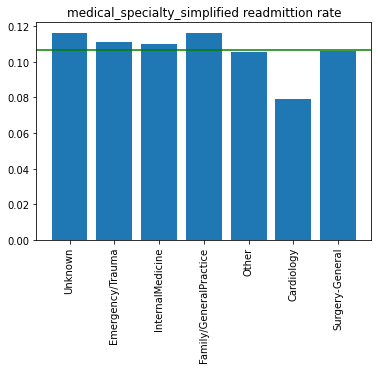

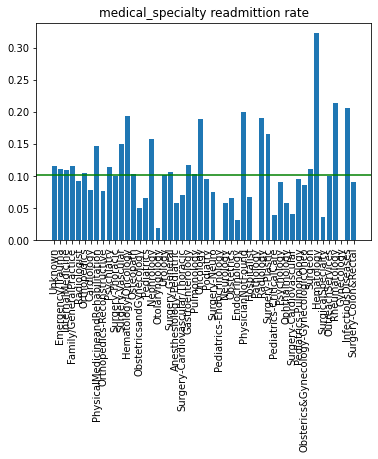

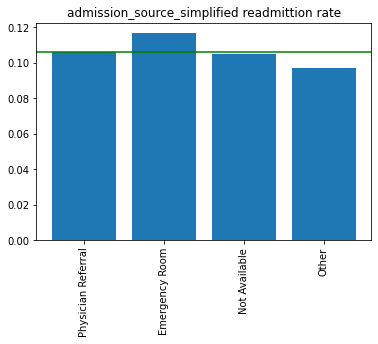

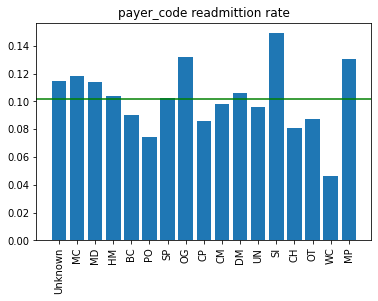

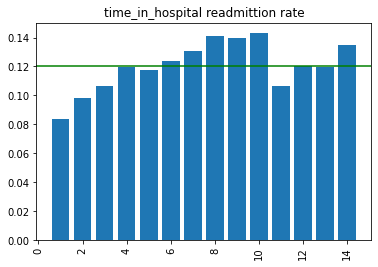

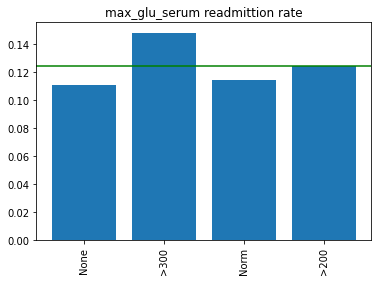

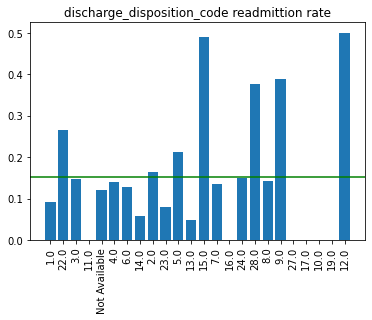

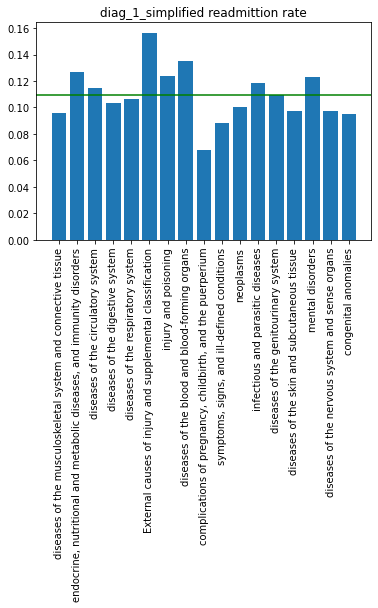

In [617]:
#check_for_discrimination(data, "gender", subgroup = "medical_specialty")
check_for_discrimination(data, "medical_specialty_simplified", min_size=10)
check_for_discrimination(data, "medical_specialty", min_size=10)

check_for_discrimination(data, "admission_source_simplified", min_size=10)
check_for_discrimination(data, "payer_code", min_size=10)

check_for_discrimination(data, "time_in_hospital", min_size=10)
check_for_discrimination(data, "max_glu_serum", min_size=10)

check_for_discrimination(data, "discharge_disposition_code", min_size=0)

check_for_discrimination(data, "diag_1_simplified", min_size=10)

#check_for_discrimination(data, "race")#, subgroup = "medical_specialty", min_size=10)
#check_for_discrimination(data, "age_as_int", min_size=10)